In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset = pd.get_dummies(dataset, drop_first=True).astype(int)

In [5]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [6]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [7]:
independent = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [8]:
dependent = dataset[['charges']]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [162]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_features='sqrt')
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(max_features='sqrt')

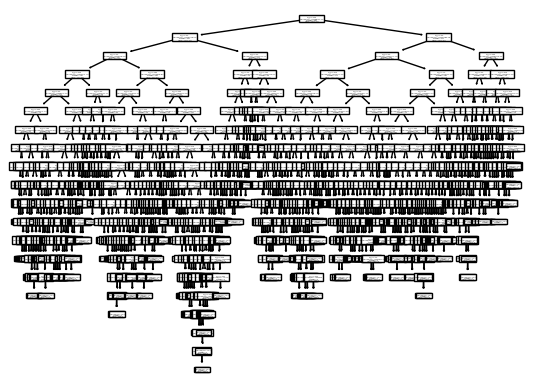

In [163]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [164]:
Y_pred = regressor.predict(X_test)

In [165]:
from sklearn.metrics import r2_score
r_score = r2_score(Y_test,Y_pred)

In [166]:
r_score

0.7780754493739108

In [167]:
import pickle
filename = "Insurance_Finalized_DTR_Model.sav"

In [168]:
pickle.dump(regressor, open(filename, 'wb'))

In [169]:
model = pickle.load(open("Insurance_Finalized_DTR_Model.sav",'rb'))

In [170]:
result = model.predict([[32,29,3,1,0]])

C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [171]:
result

array([6184.])